In [1]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('../')
from tools.mongo_analysis_tools import *
from tools.plots import get_dendro_heatmap, get_expression_hist
from tools.get_predictive_power import gene_predictive_accuracy


#import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True) # run at the start of every ipython notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
output = collect_run_output(21081, 30940, 'PAN_CANCER_regressor_DS', verbose=1)

All these experiments belong to experiment: PAN_CANCER_regressor_DS


In [4]:
runs_per_classifier(output)

,id,#runs
name,,
LinearSVR,"[21448, 21449, 21451, 21452, 21454, 21456, 214...",36
RandomForestRegressor,"[21445, 21550, 21638, 21721, 21804, 21884, 219...",70


For the label days_survived we have 11391 samples


/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



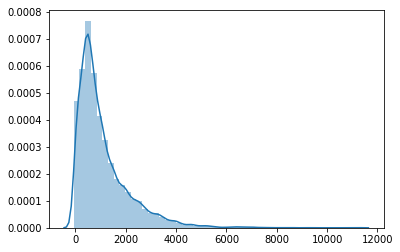

In [5]:
predict_label = output[0]['config']['predict_label']
data_latex(predict_label, regression=True)

In [6]:
selected_genes_ids, similarities = compute_gene_importance(output, similarity=10, latex=True)
similarities

\textbf{Gene analysis:}\\
The models selected have the following number of genes:\\
RandomForestRegressor: 3637\\
LinearSVR: 2761\\
Intersection: 602\\


{'LinearSVR': [0.07337590990248591,
  0.03061403508771934,
  0.07073381104033896,
  0.1600496926899438,
  0.06554097517046167,
  0.0955977229601515,
  0.15042367601245993,
  0.18644214162348768,
  0.018182925344050714,
  0.1945973681033439],
 'RandomForestRegressor': [0.12337849524358538,
  0.07625570776255719,
  0.028852134577325425,
  0.7552209970785065,
  0.007733258615858782,
  0.018994077364427205,
  0.7817693873773855,
  0.778081621321491,
  0.07637246815140705,
  0.8042159288791153]}

In [7]:
latex_genes(selected_genes_ids)

These are the top 602 genes in order of importance:\\
KHDC3L$\text{\textbar}$154288, ARNTL2$\text{\textbar}$56938, C15orf59$\text{\textbar}$388135, FGF13$\text{\textbar}$2258, PABPC4L$\text{\textbar}$132430, XAGE1B$\text{\textbar}$653067, SCGB1D2$\text{\textbar}$10647, TDGF1$\text{\textbar}$6997, ARC$\text{\textbar}$23237, CENPV$\text{\textbar}$201161, RBM11$\text{\textbar}$54033, TCL1A$\text{\textbar}$8115, CD1E$\text{\textbar}$913, SEMA6A$\text{\textbar}$57556, FAM166B$\text{\textbar}$730112, AMACR$\text{\textbar}$23600, HTR2C$\text{\textbar}$3358, ATP6V0D2$\text{\textbar}$245972, FAM110B$\text{\textbar}$90362, PRRG3$\text{\textbar}$79057, GREB1$\text{\textbar}$9687, CGB8$\text{\textbar}$94115, TPO$\text{\textbar}$7173, CYP2C18$\text{\textbar}$1562, SEL1L2$\text{\textbar}$80343, TMPRSS11F$\text{\textbar}$389208, GH2$\text{\textbar}$2689, ATP1B1$\text{\textbar}$481, LEP$\text{\textbar}$3952, TCERG1L$\text{\textbar}$256536, GSC2$\text{\textbar}$2928, TRPV3$\text{\textbar}$162514, NANOS

In [11]:
avg_per_class = compute_averages_per_classifier(output)
avg_per_class

{'LinearSVR': {'explained_variance_score': -0.0272458368257726,
  'explained_variance_score_variance': 0.00021584327254810479,
  'mean_absolute_error': 1024.231897936308,
  'mean_absolute_error_variance': 378.11860555249933,
  'mean_squared_error': 2278381.895001505,
  'mean_squared_error_variance': 8545661406.963922,
  'mean_squared_log_error': 0.0,
  'mean_squared_log_error_variance': 0.0,
  'median_absolute_error': 675.4512991438122,
  'median_absolute_error_variance': 145.15737794299218,
  'r2_score': -0.2315570678457171,
  'r2_score_variance': 0.0024969032896455324},
 'RandomForestRegressor': {'explained_variance_score': 0.06643262422557299,
  'explained_variance_score_variance': 0.00011880323767725244,
  'mean_absolute_error': 931.9311984784675,
  'mean_absolute_error_variance': 31.333850866805772,
  'mean_squared_error': 2000784.7023171573,
  'mean_squared_error_variance': 452939816.9518464,
  'mean_squared_log_error': 0.0,
  'mean_squared_log_error_variance': 0.0,
  'median_abs

In [28]:
print_latex_config(output)

\textbf{Framework configuration:}\\
Data subset:\\
Predict label: days\_survived\\
Split label: days\_survived\\
Train test split: 0.25\\
Classifiers: LinearSVC and RandomForestClassifier\\
Stop running: similarity $> 0.8$, for 10 consecutive runs\\
Number of genes selected per algorithm: 250\\


In [29]:
print_latex_prediction_metrics(output)

\textbf{Prediction metrics:}\\
Average MAE: 963.3124 (2057.6114)\\
Average MSE: 2095233.4134 (20457821869.7546)\\
Average MSLE: 0.0 (0.0)\\
Average MdAE: 615.7866 (1929.5525)\\
Average $r^2$: -0.1326 (0.006)\\
Average MSE LSVM: 2278381.895 (8545661406.9639)\\
Average MdAE LSVM: 675.4513 (145.1574)\\
Average $r^2$ LSVM: -0.2316 (0.0025)\\
Average MSE RandomForestRegressor: 2001042.7657 (461323604.5089)\\
Average MdAE RandomForestRegressor: 585.1019 (74.8988)\\
Average $r^2$ RandomForestRegressor: -0.0816 (0.0001)\\


In [27]:
gene_predictive_accuracy(output, selected_genes_ids, latex=True)

Reading data
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating RandomForestRegressor
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
Predicting and evaluating LinearSVR
We have 602 selected genes as a result, doing the same prediction again but only with these genes we get the following accuracies averaged over 10 

{'LinearSVR': [-0.19119992808209196,
  -0.19100571760676122,
  -0.19088822376223957,
  -0.19094956231686488,
  -0.19080279948519574,
  -0.19092987573969178,
  -0.19226859325684487,
  -0.19059212238355583,
  -0.19045244404670147,
  -0.19016227051327417],
 'LinearSVR_avr': -0.19092515371932214,
 'RandomForestRegressor': [-0.06663754907193642,
  -0.0635855635940783,
  -0.06679891674659921,
  -0.06745016873072585,
  -0.061785787744646825,
  -0.05999361108031609,
  -0.06144544194926782,
  -0.06110222343945493,
  -0.0624465769194924,
  -0.060826987126523235],
 'RandomForestRegressor_avr': -0.0632072826403041}

In [24]:
latex_genes(selected_genes_ids[:50])

These are the top 50 genes in order of importance:\\
KHDC3L$\text{\textbar}$154288, ARNTL2$\text{\textbar}$56938, C15orf59$\text{\textbar}$388135, FGF13$\text{\textbar}$2258, PABPC4L$\text{\textbar}$132430, XAGE1B$\text{\textbar}$653067, SCGB1D2$\text{\textbar}$10647, TDGF1$\text{\textbar}$6997, ARC$\text{\textbar}$23237, CENPV$\text{\textbar}$201161, RBM11$\text{\textbar}$54033, TCL1A$\text{\textbar}$8115, CD1E$\text{\textbar}$913, SEMA6A$\text{\textbar}$57556, FAM166B$\text{\textbar}$730112, AMACR$\text{\textbar}$23600, HTR2C$\text{\textbar}$3358, ATP6V0D2$\text{\textbar}$245972, FAM110B$\text{\textbar}$90362, PRRG3$\text{\textbar}$79057, GREB1$\text{\textbar}$9687, CGB8$\text{\textbar}$94115, TPO$\text{\textbar}$7173, CYP2C18$\text{\textbar}$1562, SEL1L2$\text{\textbar}$80343, TMPRSS11F$\text{\textbar}$389208, GH2$\text{\textbar}$2689, ATP1B1$\text{\textbar}$481, LEP$\text{\textbar}$3952, TCERG1L$\text{\textbar}$256536, GSC2$\text{\textbar}$2928, TRPV3$\text{\textbar}$162514, NANOS3

In [7]:
selected_genes_data, selected_genes_ids, sample_to_label = get_dendro_data(predict_label, selected_genes_ids)

heatmap, legend, color_scale = get_dendro_heatmap(selected_genes_data, selected_genes_ids, sample_to_label, color_option=1, nb_genes_used=50)
histogram = get_expression_hist(selected_genes_data, decimals=2, drop_zero=True, log=False, color_scale=color_scale)

In [8]:
#iplot(heatmap)

In [9]:
#iplot(histogram)

In [10]:
latex_heatmap(heatmap, histogram, theNotebook)

Succeeded in saving T_regressor_DS_hist.png
The dendro-heatmap can be found in figure \ref{fig:heat-DS}. The top 50 most enriched pathways can be found in table \ref{tab:pw-DS}.

\begin{figure}[H]
\centering
\includegraphics[height=5cm]{T_regressor_DS_heat.png}
\caption{Dendro-heatmap for the top genes}
\label{fig:heat-DS}
\end{figure}


In [25]:
pw_latex(selected_genes_ids)

querying 1-50...done. [ from cache ]
querying 0/358
querying 50/358
querying 100/358
querying 150/358
querying 200/358
querying 250/358
querying 300/358
querying 350/358
collected the 50 most enriched pathways
The top 50 most enriched pathways based on these genes are:\\
\begin{tabular}{llr}
\toprule
{} &                                               name &   p\_value \\
\midrule
0  &               Serotonin and anxiety-related events &  0.000446 \\
1  &                              Serotonin and anxiety &  0.000772 \\
2  &                       thyroid hormone biosynthesis &  0.004865 \\
3  &   Thyroid hormone synthesis - Homo sapiens (human) &  0.014041 \\
4  &                              Ion channel transport &  0.014347 \\
5  &             Thyroxine (Thyroid Hormone) Production &  0.014525 \\
6  &                 Warfarin Pathway, Pharmacokinetics &  0.019321 \\
7  &  POU5F1 (OCT4), SOX2, NANOG activate genes rela... &  0.019321 \\
8  &                          Thyroid hormone syn